In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import time 
from pylab import rcParams

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(

##  Data Exploration

In [2]:
train = pd.read_csv('train_patient.csv')
train.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
0,71.5,93.0,36.72,108.0,74.0,NaN,16.5,NaN,NaN,NaN,...,NaN,70.79,1,1.0,0.0,-0.03,2,0,0,0
1,71.5,94.0,NaN,97.0,67.0,NaN,17.0,NaN,NaN,NaN,...,NaN,70.79,1,1.0,0.0,-0.03,3,0,0,1
2,75.0,95.0,36.61,100.0,70.0,NaN,17.0,NaN,NaN,22.0,...,170.0,70.79,1,1.0,0.0,-0.03,4,0,0,2
3,71.5,94.0,NaN,100.0,66.0,NaN,19.5,NaN,NaN,NaN,...,NaN,70.79,1,1.0,0.0,-0.03,5,0,0,3
4,72.5,95.5,NaN,100.0,71.0,NaN,18.0,NaN,NaN,NaN,...,NaN,70.79,1,1.0,0.0,-0.03,6,0,0,4


## Select Relevant Columns 

In [3]:
filters_cols = ['Patient_id', 'time', 'HR', 'Age', 'MAP', 'Resp', 'Temp', 'WBC', 'PaCO2', 'SepsisLabel']

filter_train = train[filters_cols]

filter_train.head()

,Patient_id,time,HR,Age,MAP,Resp,Temp,WBC,PaCO2,SepsisLabel
0,0,0,71.5,70.79,74.0,16.5,36.72,NaN,NaN,0
1,0,1,71.5,70.79,67.0,17.0,NaN,NaN,NaN,0
2,0,2,75.0,70.79,70.0,17.0,36.61,8.8,NaN,0
3,0,3,71.5,70.79,66.0,19.5,NaN,NaN,NaN,0
4,0,4,72.5,70.79,71.0,18.0,NaN,NaN,NaN,0


In [4]:
# Total number of patients 

len(filter_train['Patient_id'].unique())

30336

## Total Number of patients with Sepsis 

In [6]:
grp_sepsis_rep = np.array(filter_train.groupby(['Patient_id']) \
                          ['SepsisLabel'].sum())

len(grp_sepsis_rep[grp_sepsis_rep > 0])

2382

## Number of hours a patient spends in Hospital 

/home/achintya/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


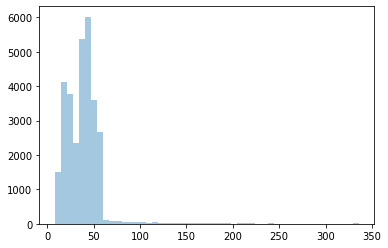

In [7]:
agg_patient_time = np.array(filter_train.groupby(['Patient_id'])['SepsisLabel']\
                            .count())
sns.distplot(agg_patient_time, kde=False);